Machine Learning Decision Tree - Ground Weather

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
#read ground weather csv file
g_data = pd.read_csv('ground_weather_preprocessed.csv')
g_data.head()

,temperature,humidity,pressure,image
0,68,65,29.63,0
1,63,78,29.64,0
2,61,83,29.64,0
3,60,86,29.65,0
4,59,87,29.65,0


In [3]:
#identify variables
X = np.array(g_data.iloc[:,0:3])
Y = np.array(g_data['image'])

In [4]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20)

In [5]:
#preform decision tree classifier
g_dt_c = tree.DecisionTreeClassifier()
g_dt_c.fit(X_train, Y_train)
pred = g_dt_c.predict(X_test)

In [6]:
#show results
print('Accuracy Score: ', accuracy_score(Y_test,pred))

Accuracy Score:  0.7052117263843648


Text(113.9222222222222, 0.5, 'Predicted')

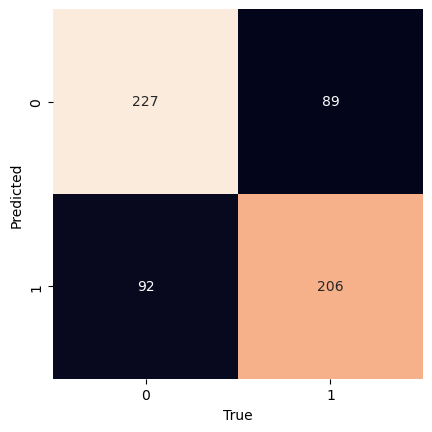

In [7]:
g_mat = confusion_matrix(Y_test, pred)
sns.heatmap(g_mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')

In [8]:
print(metrics.classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       316
           1       0.70      0.69      0.69       298

    accuracy                           0.71       614
   macro avg       0.70      0.70      0.70       614
weighted avg       0.71      0.71      0.71       614



In [9]:
#transfer decision tree into visual
export_graphviz(g_dt_c, out_file='Ground_Weather_Decision_Tree.dot')